# Bienvenida

Mi nombre es Francisco Delgado Ayala. He realizado el siguiente Notebook de Jupyter utilizando Python 3, y las librerías incluidas en Anaconda, procurando facilitar la lectura y comprensión del código a través de comentarios explicativos en cada paso.

Espero que el uso de Python facilite la enseñanza de la estadística, la metodología de la investigación y la ciencia de datos en áreas donde será de gran utilidad, tanto para el crecimiento del conocimiento como para el desarrollo de los médicos en formación. Es importante recalcar que algunos términos utilizados en este archivo son empleados por "convención" en cuanto al código, y otros para facilitar la descripción.

## Definiciones

- **Marco de datos** (Dataframe): En el contexto de programación y ciencia de datos, un Dataframe es una estructura bidimensional de datos, similar a una tabla de base de datos, una hoja de cálculo de Excel o una tabla de datos en estadísticas. Está organizado en columnas que pueden contener datos de diferentes tipos (como números, cadenas, entre otros) y permite realizar operaciones como filtrado, agrupación y agregación de datos. Las librerías de Python, como pandas, ofrecen herramientas para manipular Dataframes de manera efectiva.
- **Librería**: En programación, es una colección de funciones y procedimientos que facilita realizar tareas específicas sin redactar código desde cero. (Nota: Aunque en algunos contextos hispanohablantes "librería" se relaciona con libros, en programación se emplea para describir esta colección de herramientas).

## Pruebas estadísticas

Estos términos son ampliamente usados en estadística y en la evaluación de modelos de clasificación. A continuación, te describiré cómo se calcula cada uno, basándome en una matriz de confusión que tiene cuatro componentes: Verdaderos Positivos (VP, o TP en inglés por "True Positives"), Verdaderos Negativos (VN, o TN en inglés por "True Negatives"), Falsos Positivos (FP), y Falsos Negativos (FN).

1. **Exactitud (Accuracy)**: 
    - `(VP+VN) / (VP+VN+FP+FN)`

2. **Precisión o Valor Predictivo Positivo (VPP)**:
    - `(VP) / (VP+FP)`

3. **Sensibilidad (Recall)**:
    - `(VP) / (VP+FN)`
    - Es la proporción de positivos reales que fueron identificados correctamente.

4. **F1-Score**:
    - `2 * (Precisión * Sensibilidad) / (Precisión + Sensibilidad)`
    - Es la media armónica entre precisión y sensibilidad.

5. **Especificidad**:
    - `(VN) / (VN + FP)`
    - Es la proporción de negativos reales que fueron identificados correctamente.

6. **Valor Predictivo Negativo (VPN)**:
    - `(VN) / (VN + FN)`

Estos cálculos asumen que tienes acceso a la matriz de confusión de tu modelo o método de clasificación. La matriz de confusión es una herramienta esencial para evaluar la calidad de un clasificador, especialmente en contextos donde las clases no están equilibradas.


## 1.-Importando las librerías y archivos necesarios y realizando los ajustes iniciales
### 1.1.-Realizaremos un análisis inicial de los tipos de datos y llevaremos a cabo un análisis exploratorio

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson, zscore
import openpyxl as op
import sklearn
#import ydata_profiling as ydp

In [10]:
# Establecememos semillas para reproducibilidad

np.random.seed(1)
semilla_arreglo_aleatorio = np.random.randint(1, 150, size=4)
print('Semillas para arreglos aleatorios: ', semilla_arreglo_aleatorio)

Semillas para arreglos aleatorios:  [ 38 141  73 138]


In [11]:
archivo = 'datos.xlsx'

df = pd.read_excel(archivo, sheet_name = 'p1')
df.sort_index(inplace=True)

## 2.-Limpieza de datos
Transformación de tipo de datos

In [12]:
# Convertir cm a m
df['cc'] = df['cc'] / 100

# Agregaremos las columnas de imc, cct, cnhdl, chdl
df['imc'] = (df['p'] / (df['t'] ** 2))
df['cct'] = df['cc'] / df['t']
df['cnhdl'] = df['c'] - df['hdl']
df['chdl'] = df['c'] / df['hdl']

df.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,18,1,1.0,62.0,1.55,101.0,70.0,85,188,53,0.81,NaN,25.806452,0.522581,135,3.547170
1,18,2,1.0,70.0,1.67,93.0,63.0,86,155,54,0.90,NaN,25.099502,0.538922,101,2.870370
2,19,1,1.0,56.0,1.58,109.0,73.0,93,143,60,0.67,33.6,22.432303,0.424051,83,2.383333
3,19,1,1.0,52.2,1.59,108.0,75.0,93,143,60,0.67,33.6,20.647917,0.421384,83,2.383333
4,19,1,1.0,53.0,1.54,118.0,72.0,83,146,52,0.73,NaN,22.347782,0.474026,94,2.807692


In [13]:
df.dtypes

e          int64
s          int64
u        float64
p        float64
t        float64
ts       float64
td       float64
gs         int64
c          int64
hdl        int64
cc       float64
pp       float64
imc      float64
cct      float64
cnhdl      int64
chdl     float64
dtype: object

In [14]:
df_categorico = df.copy()
df_numerico = df.copy()

# Convertimos las variables categoricas
df_categorico['s'] = df_categorico['s'].map({1: '1', 2: '2'})
df_categorico['u'] = df_categorico['u'].map({1: '1', 2: '2', 3: '3', 4: '4'})

df_categorico['s'] = df_categorico['s'].astype('category')
df_categorico['u'] = df_categorico['u'].astype('category')

In [15]:
# Estandarizaremos los datos y convertiremos las variables correspondientes a tipo categórica y 
# numérica para facilitar el análisis estadístico

# Definimos una función para estandarizar todas las columnas necesarias
def estandarizar_todas_columnas(df, columnas, medias_todas_columnas, desviaciones_todas_columnas):
    for columna in columnas:
        df[columna] = (df[columna] - medias_todas_columnas[columna]) / desviaciones_todas_columnas[columna]
    return df

# Definimos una función para desestandarizar todas las columnas necesarias
def desestandarizar_todas_columnas(df, columnas, medias_todas_columnas, desviaciones_todas_columnas):
    for columna in columnas:
        df[columna] = (df[columna] * desviaciones_todas_columnas[columna]) + medias_todas_columnas[columna]
    return df

# Definimos una función para estandarizar las columnas necesarias
def estandarizar_columnas(df, columnas, medias_columnas, desviaciones_columnas):
    for columna in columnas:
        df[columna] = (df[columna] - medias_columnas[columna]) / desviaciones_columnas[columna]
    return df

# Definimos una función para desestandarizar las columnas necesarias
def desestandarizar_columnas(df, columnas, medias_columnas, desviaciones_columnas):
    for columna in columnas:
        df[columna] = (df[columna] * desviaciones_columnas[columna]) + medias_columnas[columna]
    return df

# Definimos una función para exportar los datos imputados a un archivo excel
def exportar_imputados_a_excel (df, sheet_name):
    filepath = 'datos.xlsx'
    with pd.ExcelWriter(filepath, mode='a', if_sheet_exists='replace') as writer:
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [16]:
todas_columnas_a_estandarizar = ['e', 's', 'u', 'p', 't', 'ts',
                                'td', 'cc', 'gs', 'c', 'hdl', 'pp',
                                'imc', 'cct', 'cnhdl', 'chdl']

medias_todas_columnas = df_numerico[todas_columnas_a_estandarizar].mean()
desviaciones_todas_columnas = df_numerico[todas_columnas_a_estandarizar].std()

columnas_a_estandarizar = ['e', 'p', 't', 'ts', 'td', 
                           'cc', 'gs', 'c', 'hdl', 'pp', 
                           'imc', 'cct', 'cnhdl', 'chdl']

medias_columnas = df_categorico[columnas_a_estandarizar].mean()
desviaciones_columnas = df_categorico[columnas_a_estandarizar].std()

In [17]:
dfce = df_categorico.copy()
# dfce = DataFrame Categorico Estandarizado
dfne = df_numerico.copy()
# dfne = DataFrame Numerico Estandarizado

In [18]:
# Estandarizamos el df de variables catégoricas
dfce = estandarizar_columnas(
    dfce, 
    columnas_a_estandarizar, 
    medias_columnas,
    desviaciones_columnas)

dfce.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,-1.927156,1,1,-0.632172,-0.601558,-1.112621,-0.603273,-0.380254,0.034136,0.858223,-0.712639,NaN,-0.351003,-0.487170,-0.210485,-0.748691
1,-1.927156,2,1,-0.025198,0.798075,-1.614118,-1.391666,-0.346833,-0.826497,0.952245,0.044068,NaN,-0.506991,-0.271543,-1.125752,-1.319462
2,-1.843310,1,1,-1.087402,-0.251650,-0.611125,-0.265391,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.095507,-1.787279,-1.610304,-1.730199
3,-1.843310,1,1,-1.375714,-0.135014,-0.673812,-0.040136,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.489231,-1.822470,-1.610304,-1.730199
4,-1.843310,1,1,-1.315017,-0.718194,-0.046941,-0.378018,-0.447097,-1.061215,0.764201,-1.385268,NaN,-1.114156,-1.127852,-1.314189,-1.372321


In [19]:
dfce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   e       641 non-null    float64 
 1   s       641 non-null    category
 2   u       636 non-null    category
 3   p       641 non-null    float64 
 4   t       641 non-null    float64 
 5   ts      637 non-null    float64 
 6   td      637 non-null    float64 
 7   gs      641 non-null    float64 
 8   c       641 non-null    float64 
 9   hdl     641 non-null    float64 
 10  cc      552 non-null    float64 
 11  pp      115 non-null    float64 
 12  imc     641 non-null    float64 
 13  cct     552 non-null    float64 
 14  cnhdl   641 non-null    float64 
 15  chdl    641 non-null    float64 
dtypes: category(2), float64(14)
memory usage: 71.8 KB


In [20]:
# Estandarizamos el df de variables numéricas
dfne = estandarizar_todas_columnas(
    dfne,
    todas_columnas_a_estandarizar,
    medias_todas_columnas,
    desviaciones_todas_columnas)

dfne.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,-1.927156,-0.670465,-0.69206,-0.632172,-0.601558,-1.112621,-0.603273,-0.380254,0.034136,0.858223,-0.712639,NaN,-0.351003,-0.487170,-0.210485,-0.748691
1,-1.927156,1.489174,-0.69206,-0.025198,0.798075,-1.614118,-1.391666,-0.346833,-0.826497,0.952245,0.044068,NaN,-0.506991,-0.271543,-1.125752,-1.319462
2,-1.843310,-0.670465,-0.69206,-1.087402,-0.251650,-0.611125,-0.265391,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.095507,-1.787279,-1.610304,-1.730199
3,-1.843310,-0.670465,-0.69206,-1.375714,-0.135014,-0.673812,-0.040136,-0.112882,-1.139454,1.516375,-1.889739,-0.326291,-1.489231,-1.822470,-1.610304,-1.730199
4,-1.843310,-0.670465,-0.69206,-1.315017,-0.718194,-0.046941,-0.378018,-0.447097,-1.061215,0.764201,-1.385268,NaN,-1.114156,-1.127852,-1.314189,-1.372321


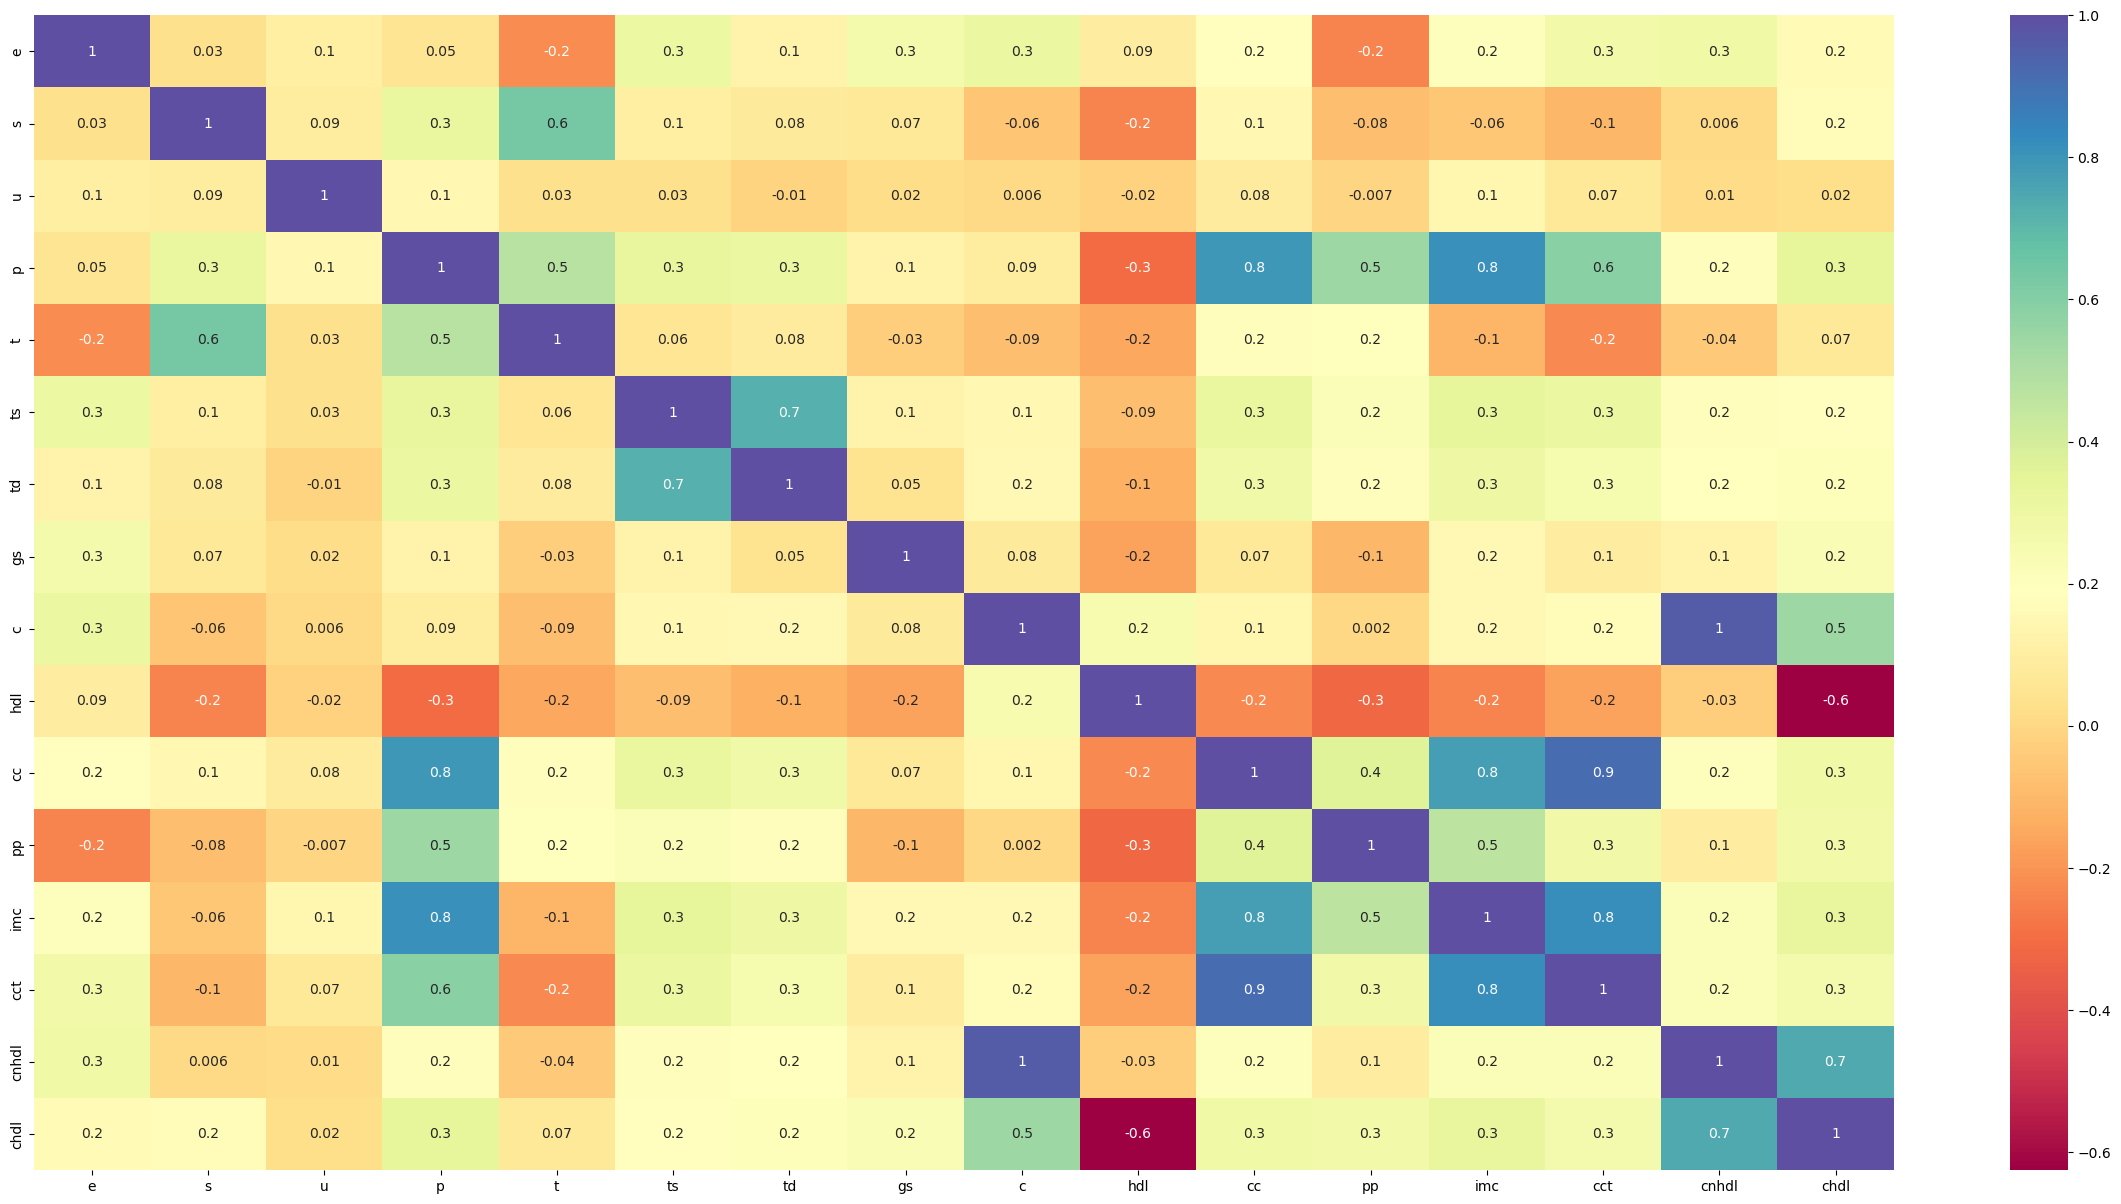

In [21]:
corrMatrix = dfne.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrMatrix, annot=True, fmt='.1g', ax=ax, cmap='Spectral');

# Métodos de predicción